<a href="https://colab.research.google.com/github/karthikkrishnan1986/regression_algorithms/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Karthik Krishnan - Predicting Customer Churn with Logistic Regression – An End-to-End Machine Learning Project**

**Author:** Karthik Krishnan (https://github.com/karthikkrishnan1986)

**Repository:** [Logistic Regression] https://github.com/karthikkrishnan1986/regression_algorithms

**Date:** July 04, 2025

**Purpose:** Predicting Customer Churn with Logistic Regression using Pandas, Numpy, Scikit-Learn, Matplotlib, Seaborn

### Step 1: Import Necessary Libraries
We will use Python libraries like pandas, Seaborn, and Matplotlib for data analysis and visualization.

In [1]:
# Importing the key libriaies required for the Model building
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import io

### 2. Load the Telco-Customer-Churn Dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [3]:
# Read the CSV dataset through the Data Frame
df = pd.read_csv(io.BytesIO(uploaded['WA_Fn-UseC_-Telco-Customer-Churn.csv']))

In [4]:
# Inspect the shape of the DataFrame with shape attribute
# The shape is a tuple with count of rows and columns in the DataFrame
df.shape

(7043, 21)

In [5]:
# Show the column list
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# Inspect the data types of the columns with info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# configure the display behavior of DataFrames
pd.set_option('display.max_columns', None)

# # Specify the number of rows to display
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [48]:
'''This line of Python code, using the pandas library,
efficiently identifies and extracts the names of all numeric columns within the DataFrame'''
number_columns = df.select_dtypes(include='number').columns.tolist()
print(number_columns)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn', 'TotalCharges_numeric']


In [9]:
'''Identifies all columns in the DataFrame df that store categorical or object-type data'''
cat_obj = df.select_dtypes(include=['category','object']).columns.tolist()
print(cat_obj)

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [10]:
# Find if there are any class imbalances in target column
df['Churn'].value_counts(normalize = True)*100

,proportion
Churn,
No,73.463013
Yes,26.536987


In [11]:
df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


In [12]:
#Convert object to number for the column 'TotalCharges' since the values are in numeric
df['TotalCharges_numeric'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [13]:
df['TotalCharges_numeric'].isnull().sum()

np.int64(11)

In [14]:
# Inspect if there are null values for the numeric column "TotalCharges_numeric"
df[df['TotalCharges_numeric'].isnull()][['tenure', 'MonthlyCharges', 'TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
488,0,52.55,
753,0,20.25,
936,0,80.85,
1082,0,25.75,
1340,0,56.05,
3331,0,19.85,
3826,0,25.35,
4380,0,20.00,
5218,0,19.70,
6670,0,73.35,


In [15]:
# Inspecting if there are any additional null values
df[(df['tenure'] == 0) & (df['TotalCharges_numeric'] > 0)][['tenure', 'TotalCharges', 'TotalCharges_numeric']]

,tenure,TotalCharges,TotalCharges_numeric


In [16]:
# Perform missing data imputation
df.fillna({'TotalCharges_numeric': 0}, inplace=True)

In [17]:
#Ensure no null values
df['TotalCharges_numeric'].isna().sum()

np.int64(0)

In [18]:
# Check for Category columns
df.select_dtypes(include=['category']).columns

Index([], dtype='object')

In [19]:
print(cat_obj)

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [20]:
# Columns to be removed
remove_col = ['customerID','TotalCharges','Churn']

In [21]:
# Excluding the columns to be removed
cat_features  = [col for col in cat_obj if col not in remove_col]
print(cat_features)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [22]:
# Performs one-hot encoding on the specified categorical features within a Pandas DataFrame.
df_dummies = pd.get_dummies(df[cat_features],drop_first=True)

In [23]:
# Inspect the number of columns
df_dummies.shape

(7043, 26)

In [24]:
# Column list post One Hot Encoding
df_dummies.columns

Index(['gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [25]:
# Check count for target column
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [26]:
# Map string values to numerical representations for target column using Pandas DataFrame
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [27]:
# Inspect if the mapping is done correctly
df['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


In [28]:
df_numbers = df.select_dtypes(include='number').columns
print(df_numbers)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn',
       'TotalCharges_numeric'],
      dtype='object')


In [29]:
# Creating a clean df with all the required column concatenated
df_model = pd.concat([df_dummies, df[df_numbers]], axis=1)
df_model.head(3)

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,Churn,TotalCharges_numeric
0,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,0,1,29.85,0,29.85
1,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,0,34,56.95,0,1889.50
2,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,0,2,53.85,1,108.15


In [30]:
'''Calculate and store the pairwise correlations between all the columns in the DataFrame
using the pandas library in Python'''
correlation_matrix = df_model.corr()

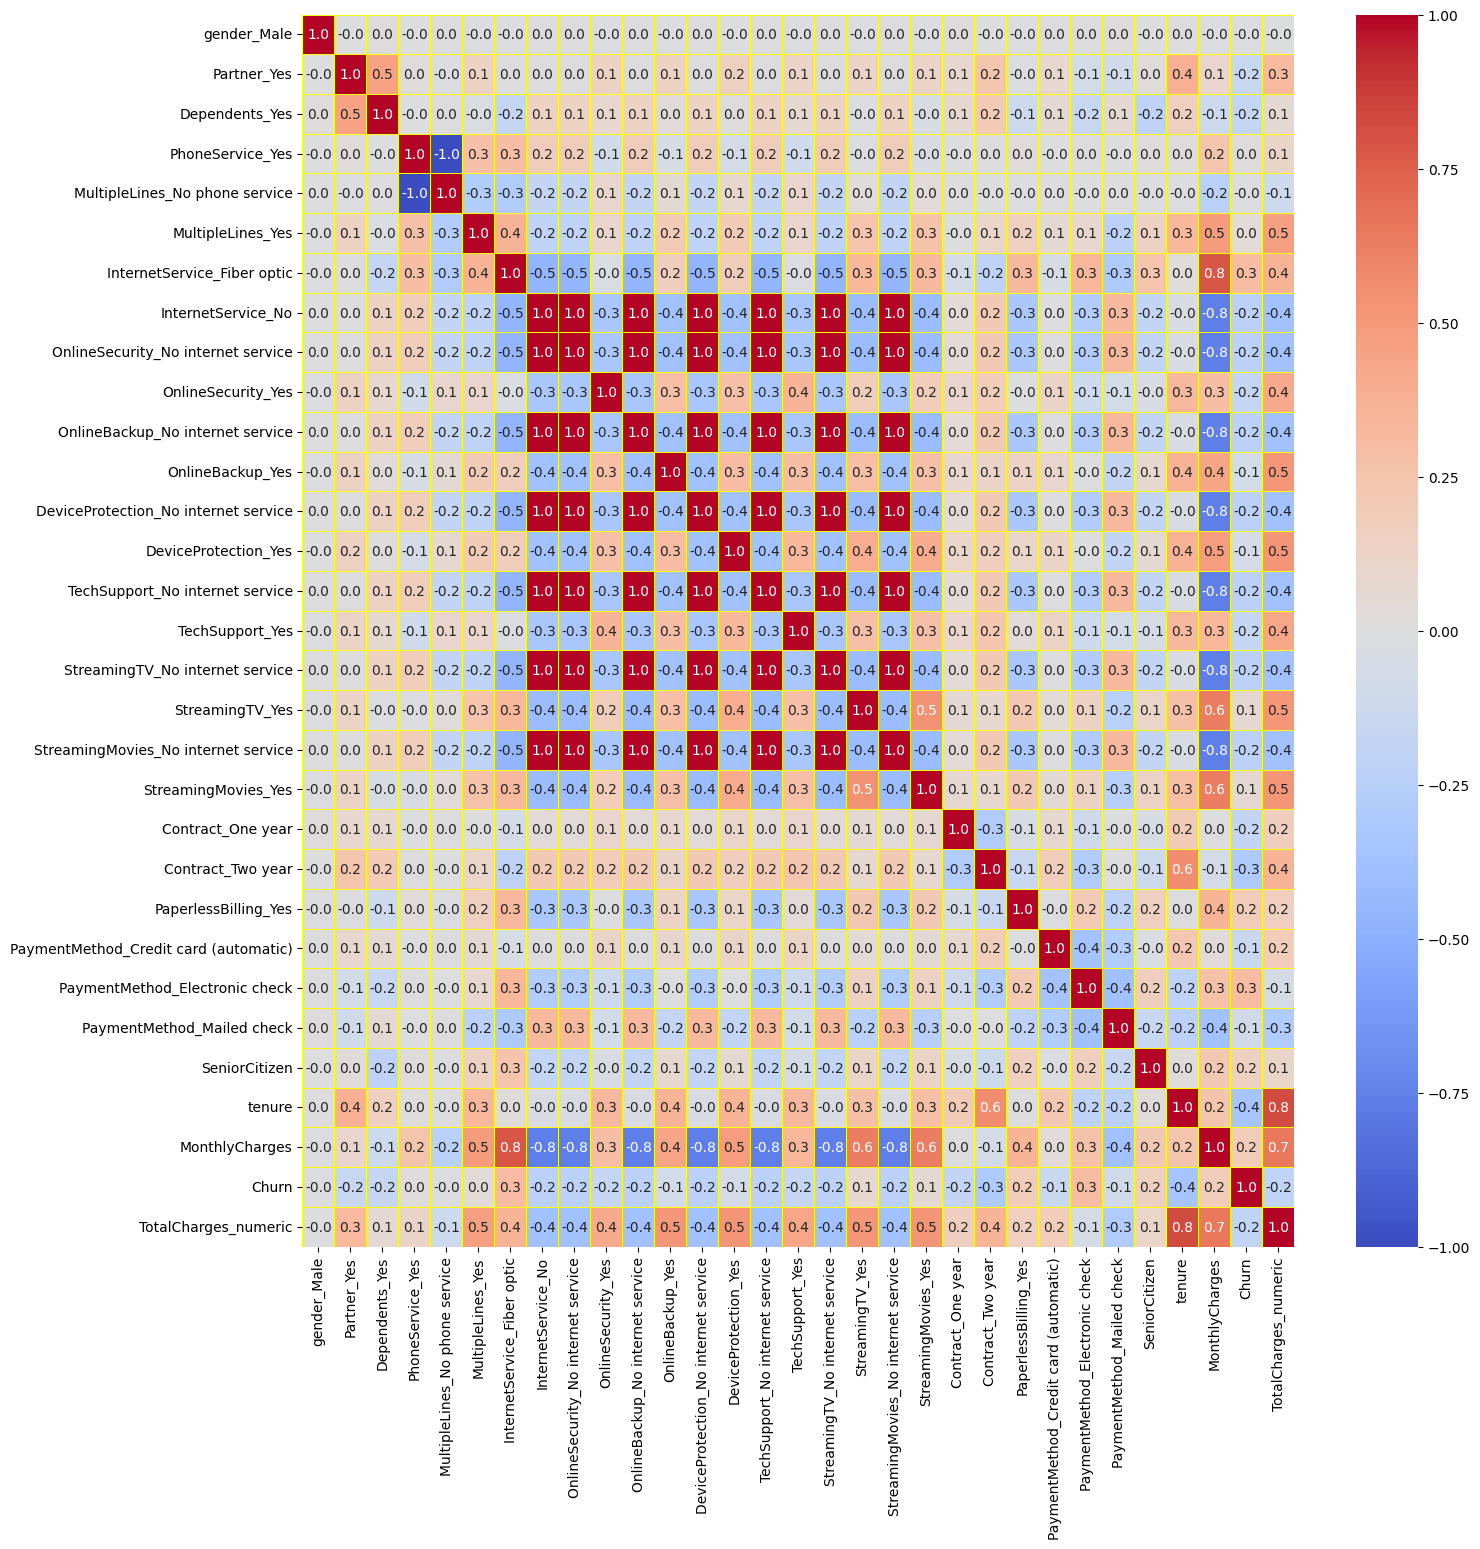

In [31]:
# Plot the heatmap with correlation_matrix
plt.figure(figsize=(16,16))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0,
            annot=True, fmt=".1f", linewidths=0.5, linecolor='yellow')
plt.show()

In [32]:
# The correlation values between the 'Churn' target variable and all other variables in the matrix.
churn_corr = correlation_matrix['Churn'].sort_values(ascending=False)
print(churn_corr)

Churn                                    1.000000
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
MonthlyCharges                           0.193356
PaperlessBilling_Yes                     0.191825
SeniorCitizen                            0.150889
StreamingTV_Yes                          0.063228
StreamingMovies_Yes                      0.061382
MultipleLines_Yes                        0.040102
PhoneService_Yes                         0.011942
gender_Male                             -0.008612
MultipleLines_No phone service          -0.011942
DeviceProtection_Yes                    -0.066160
OnlineBackup_Yes                        -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner_Yes                             -0.150448
Dependents_Yes                          -0.164221
TechSupport_Yes                         -0.164674
OnlineSecurity_Yes                      -0.171226


<Axes: >

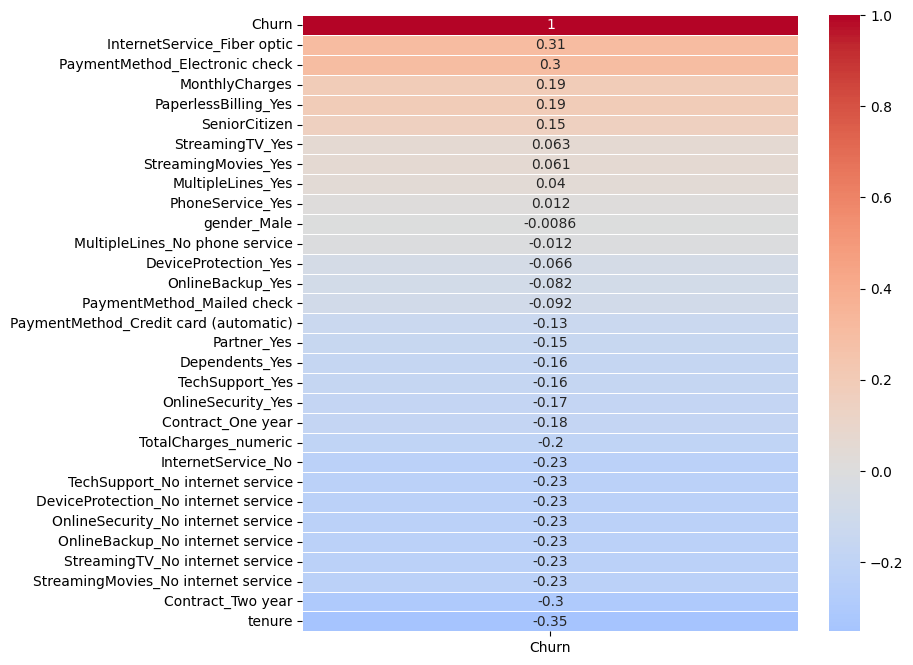

In [33]:
# # Plot the heatmap with Target column
plt.figure(figsize=(8,8))
sns.heatmap(data=churn_corr.to_frame(), annot=True,cmap='coolwarm',
            center=0,
            linewidths=0.5 )

In [34]:
# Building the model
# Define the features and target
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

In [35]:
# Spliting the data into Train(80%) & Test(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [36]:
# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [37]:
# Predecting the model using the test data
y_pred = model.predict(X_test)

In [38]:
# Evaluate the model performance
performance_report = classification_report(y_test, y_pred)
print(performance_report)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.74      1409
weighted avg       0.80      0.80      0.80      1409



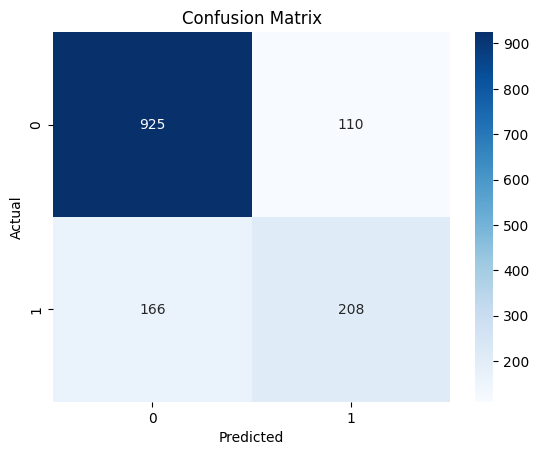

In [39]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [40]:
'''Since the recall number is low and the target column is imbalanced,
we are balancing the data without adding any new data'''
model_balanced = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In imbalanced datasets, models tend to be biased toward the majority class (non-churners).

Without balancing, the model underperformed on churners, showing low recall for class 1.

With class_weight='balanced', the model was encouraged to pay more attention to minority class examples during training.

In [41]:
# Train the model with balanced data
model_balanced.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [42]:
# Using the trained model_balanced to generate predictions on the X_test
y_predict_balanced = model_balanced.predict(X_test)

In [43]:
# Classification Report with balanced data
balanced_performance_report = classification_report(y_test, y_predict_balanced)

print(balanced_performance_report)

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.50      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



The model correctly identified 79% of actual churners (high recall for class 1).

However, about 50% of the predicted churns were actually correct (moderate precision).

The model misclassified some non-churners as churners, leading to false positives, but this is an acceptable trade-off in many real-world business settings, where it's better to act on a potential churner than miss one entirely.

The overall accuracy is 74%, with a balanced F1-score for the churn class, indicating a good balance between precision and recall.

In [44]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [45]:
# Building the model with scaled data
model_scaled = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [46]:
model_scaled.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [47]:
# Classification report post scaling the data
y_pred_scaled = model_scaled.predict(X_test_scaled)
classification_report_scaled = classification_report(y_test, y_pred_scaled)
print(classification_report_scaled)

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.50      0.78      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



The logistic regression model was re-evaluated after applying feature scaling using StandardScaler. The updated classification report above.

The model maintains strong recall for churned customers (class 1) at 78%, meaning it correctly identifies most customers who are likely to churn.

Precision for churn (class 1) is 50%, indicating that half of the predicted churns are correct — a trade-off resulting from class imbalance handling.

Overall accuracy is 74%, which remains consistent with the unscaled model.

There is no significant change in performance metrics compared to the model without scaling.

This indicates that the original numeric features were likely already on a relatively comparable scale, and scaling did not negatively affect model performance.

| Metric                          | **Before Scaling** | **After Scaling** | **Observation**           |
| ------------------------------- | ------------------ | ----------------- | ---------------------------- |
| **Precision (Class 1 - Churn)** | 0.50               | 0.50              | No change                    |
| **Recall (Class 1 - Churn)**    | 0.79               | 0.78              | Slight decrease (negligible) |
| **F1-score (Class 1 - Churn)**  | 0.62               | 0.61              | Slight decrease (negligible) |
| **Accuracy**                    | 0.74               | 0.74              | No change                    |
| **Precision (Class 0)**         | 0.90               | 0.90              | No change                    |
| **Recall (Class 0)**            | 0.72               | 0.72              | No change                    |
| **F1-score (Class 0)**          | 0.80               | 0.80              | No change                    |


## Project Summary: Customer Churn Prediction

### Objective

To build a machine learning pipeline that predicts customer churn using structured customer data, enabling proactive retention strategies in a subscription-based business.

---

### Step-by-Step Workflow

#### 1. **Data Loading and Inspection**

* Loaded Telco Customer Churn dataset
* Understood structure, types, and target variable distribution
* Found class imbalance (\~26.5% churn rate)

#### 2. **Data Cleaning**

* Identified `TotalCharges` column as object type → converted to numeric
* Handled 11 rows with missing `TotalCharges_numeric` by imputing based on domain insight (`tenure = 0 → TotalCharges = 0`)

#### 3. **Feature Engineering**

* Converted categorical variables using **One-Hot Encoding** (`pd.get_dummies`)
* Mapped `Churn` column to binary: Yes → 1, No → 0
* Scaled numeric features with `StandardScaler` for consistency

#### 4. **Imbalance Handling**

* Used `class_weight='balanced'` in logistic regression to counter class imbalance
* Improved **recall for churners** significantly without generating synthetic data

#### 5. **Modeling**

* Applied **Logistic Regression**:

  * Without scaling → baseline model
  * With scaling → cleaner optimization, similar results
* Evaluated with:

  * Confusion Matrix
  * Precision, Recall, F1-score
  * Business interpretation of performance

#### 6. **Results**

| Metric               | Before Balancing | After `class_weight='balanced'` |
| -------------------- | ---------------- | ------------------------------- |
| Recall (Churn Class) | \~56%            | **\~78%**                     |
| Accuracy             | \~80%            | \~74% (expected drop)           |
| Precision (Churn)    | \~65%            | \~50% (trade-off accepted)      |

---

### Key Takeaways

* **Data imbalance can mislead performance metrics** — recall is a more meaningful metric for churn detection.
* `class_weight='balanced'` is a strong first-line strategy to improve recall without overcomplicating the pipeline.
* Feature scaling had **minimal impact** here, but it's good practice for generalizability and future models.
* The entire pipeline—from loading to evaluation—shows how to apply machine learning thoughtfully in a business context.

---

### Project Repository & LinkedIn Post

* 🔗 GitHub: \[*https://github.com/karthikkrishnan1986/regression_algorithms*]
* 💬 LinkedIn: \[*https://www.linkedin.com/in/karthik-krishnan-18642533/*]

---
